In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

In [4]:
og = pd.read_csv("US_Accidents_March23.csv", index_col="City")
print(og.shape)
print(og.isna().sum())

(7728394, 45)
ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump                         

In [8]:
# some initial cleaning
columns_to_use = ['Severity', 'Start_Time', 'Temperature(F)', 'Wind_Chill(F)', 'Weather_Condition', 
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Humidity(%)', 
       "Start_Lat", "Start_Lng"]
# df = og[columns_to_use]
df = og

In [ ]:
Fresno = df.loc["Fresno"]         # getting 2 new dataframes, one for accidents in Fresno and one for St Louis
StLouis = df.loc["St Louis"]

Fresno = Fresno.reset_index(drop=True)
StLouis = StLouis.reset_index(drop=True)

# some cleaning first for Fresno
print(Fresno.shape)
# print(Fresno.isna().sum())

# get rid of duplicates
Fresno = Fresno.drop_duplicates(subset=['Start_Lat', 'Start_Lng', 'Start_Time'])

# fill nan values
missing = Fresno.isna().sum()
print(missing)
Fresno = Fresno.ffill().bfill()    # makes sense to forward and back fill because days that are close to each other will have similar values

# save mostly cleaned data to a smaller csv
Fresno.to_csv("Fresno_accidents.csv.zip", compression={'method': 'zip'})

(16289, 46)
Unnamed: 0               0
ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Street                   0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout      

In [14]:
# now similar cleaning for StLouis
print(StLouis.shape)
# print(Fresno.isna().sum())

# get rid of duplicates
StLouis = StLouis.drop_duplicates(subset=['Start_Lat', 'Start_Lng', 'Start_Time'])

# fill nan values
missing = StLouis.isna().sum()
StLouis = StLouis.ffill().bfill()    # makes sense to forward and back fill because days that are close to each other will have similar values

# save mostly cleaned data to a smaller csv
StLouis.to_csv("StLouis_accidents.csv.zip")

(1782, 45)


/var/folders/5s/rp_fb3mj71d91by4qs8qgmcr0000hs/T/ipykernel_44784/3482599675.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  StLouis = StLouis.ffill().bfill()    # makes sense to forward and back fill because days that are close to each other will have similar values


### Data Analysis below here

In [68]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt


In [6]:
Fresno = pd.read_csv("Fresno_accidents.csv")
StLouis = pd.read_csv("StLouis_accidents.csv")
print(Fresno.columns)

Index(['Unnamed: 0', 'ID', 'Source', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Street', 'County', 'State', 'Zipcode', 'Country',
       'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')


In [60]:
# weather analysis for Fresno
Fresno = pd.read_csv("Fresno_accidents.csv")

new = Fresno[['Severity', 'Temperature(F)', 'Wind_Chill(F)', 'Weather_Condition', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Humidity(%)', 'Start_Lat', 'Start_Lng']]

Fresno = pd.get_dummies(new, "Weather_Condition")
# print(Fresno.shape)

Fresno["labels"] = Fresno["Severity"] >= 3
# print(Fresno.columns)

# get train and test data
shuffled = Fresno.sample(frac=1, random_state=21)
groups = np.array_split(shuffled, 3)

X = groups[0].to_numpy().astype(float)
X_train, y_train = X[:, 1:-1], X[:, -1]

forest = RandomForestClassifier(oob_score=True)
forest.fit(X_train, y_train)
print(f"oob score: {forest.oob_score_}")
print(f"\nFeature importance: {sorted(list(zip(forest.feature_importances_, Fresno.columns[1:-1])))[::-1]}")

# get accuracy score
X1 = groups[1].to_numpy().astype(float)
X_test, y_test = X1[:, 1:-1], X[:, -1]
pred = forest.predict(X_test)
print(f"\nAccuracy Score: {accuracy_score(pred, y_test)}")

/usr/local/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


oob score: 0.9871086556169429

Feature importance: [(np.float64(0.16111454623860808), 'Start_Lat'), (np.float64(0.15738679695770452), 'Start_Lng'), (np.float64(0.1237628988621414), 'Pressure(in)'), (np.float64(0.11984914301404208), 'Humidity(%)'), (np.float64(0.10392249540873985), 'Temperature(F)'), (np.float64(0.09946508401400331), 'Wind_Chill(F)'), (np.float64(0.07762591127059158), 'Wind_Speed(mph)'), (np.float64(0.04800231309610276), 'Precipitation(in)'), (np.float64(0.029668684653351398), 'Visibility(mi)'), (np.float64(0.01334953721233937), 'Weather_Condition_Overcast'), (np.float64(0.01299759996455038), 'Weather_Condition_Mostly Cloudy'), (np.float64(0.011783209151944078), 'Weather_Condition_Partly Cloudy'), (np.float64(0.010206708995129451), 'Weather_Condition_Clear'), (np.float64(0.006603302161904013), 'Weather_Condition_Fair'), (np.float64(0.004531279407329987), 'Weather_Condition_Haze'), (np.float64(0.004140343188542848), 'Weather_Condition_Partly Cloudy / Windy'), (np.float64

In [ ]:
# weather analysis for Fresno without Lat and Long
Fresno = pd.read_csv("Fresno_accidents.csv")

new = Fresno[['Severity', 'Temperature(F)', 'Wind_Chill(F)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Humidity(%)']]

# Fresno = pd.get_dummies(new, "Weather_Condition")
Fresno = new
Fresno["labels"] = Fresno["Severity"] >= 3   # new column for binary severity labels

# get train and test data
shuffled = Fresno.sample(frac=1, random_state=21)
groups = np.array_split(shuffled, 3)

X = groups[0].to_numpy().astype(float)
X_train, y_train = X[:, 1:-1], X[:, -1]

forest = RandomForestClassifier(oob_score=True)
forest.fit(X_train, y_train)
print(f"oob score: {forest.oob_score_}")
sorted_importance_fresno = sorted(list(zip(forest.feature_importances_, Fresno.columns[1:-1])))[::-1]
print(f"\nFeature importance: {sorted_importance_fresno}")

# get accuracy score
X1 = groups[1].to_numpy().astype(float)
X_test, y_test = X1[:, 1:-1], X[:, -1]
pred = forest.predict(X_test)
print(f"\nAccuracy Score: {accuracy_score(pred, y_test)}")

/usr/local/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


oob score: 0.9858195211786372

Feature importance: [(np.float64(0.21086895304197845), 'Humidity(%)'), (np.float64(0.20933461832704225), 'Pressure(in)'), (np.float64(0.1677583656790625), 'Temperature(F)'), (np.float64(0.14879341935573445), 'Wind_Chill(F)'), (np.float64(0.13645514746052148), 'Wind_Speed(mph)'), (np.float64(0.06750264875026056), 'Precipitation(in)'), (np.float64(0.059286847385400396), 'Visibility(mi)')]

Accuracy Score: 0.983609576427256


In [82]:
# weather analysis for St Louis without Weather_Condition
StLouis = pd.read_csv("StLouis_accidents.csv")

new = StLouis[['Severity', 'Temperature(F)', 'Wind_Chill(F)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Humidity(%)']]

# StLouis = pd.get_dummies(new, "Weather_Condition")
# print(StLouis.shape)
StLouis = new
StLouis["labels"] = StLouis["Severity"] >= 3

# get train and test data
shuffled = StLouis.sample(frac=1, random_state=21)
groups = np.array_split(shuffled, 3)

X = groups[0].to_numpy().astype(float)
X_train, y_train = X[:, 1:-1], X[:, -1]

forest = RandomForestClassifier(oob_score=True)
forest.fit(X_train, y_train)
print(f"\noob score: {forest.oob_score_}")
print(f"\nFeature importance:")
sorted_importance_stlouis = sorted(list(zip(forest.feature_importances_, list(Fresno.columns[1:]))))[::-1]
print(sorted_importance_stlouis)

# test it
test = groups[1].to_numpy().astype(float)
X_test, y_test = test[:, 1:-1], test[:, -1]
pred = forest.predict(X_test).round()
score = accuracy_score(y_test, pred)
print(f"\nAccuracy Score: {score}\n")


/usr/local/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)



oob score: 0.8263157894736842

Feature importance:
[(np.float64(0.2367266220683493), 'Pressure(in)'), (np.float64(0.20483189017170556), 'Humidity(%)'), (np.float64(0.17615792639785569), 'Wind_Chill(F)'), (np.float64(0.17399441230123658), 'Temperature(F)'), (np.float64(0.14870368104210388), 'Wind_Speed(mph)'), (np.float64(0.03899790779869706), 'Visibility(mi)'), (np.float64(0.02058756022005202), 'Precipitation(in)')]

Accuracy Score: 0.7943760984182777



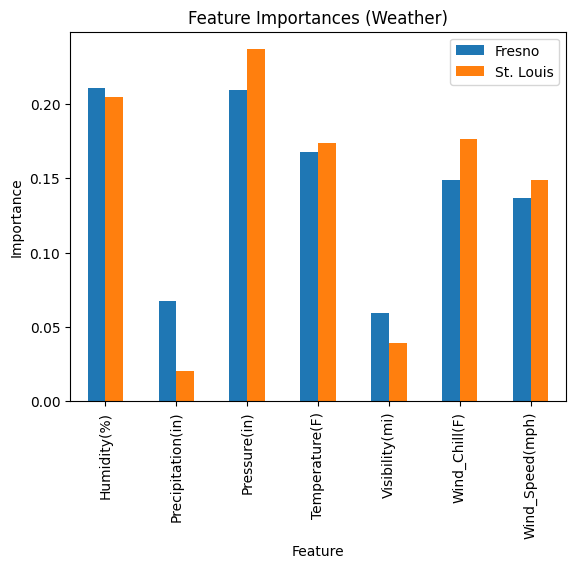

In [90]:
# plot both side by side in a bar plot
importances1 = pd.Series([i for i, _ in sorted_importance_fresno], index=[j for _, j in sorted_importance_fresno])
importances2 = pd.Series([i for i, _ in sorted_importance_stlouis], index=[j for _, j in sorted_importance_stlouis])
overall = pd.DataFrame({"Fresno": importances1, "St. Louis": importances2})

ax = overall.plot(kind='bar')
plt.legend()
plt.title("Feature Importances (Weather)")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.savefig("weather_importances.png")
plt.show()



Again pressure and humidity were the greatest predictors and precipitation and visibility were the least


## Do I know what this is saying? What labels are they predicting and how?

In [97]:
# road features analysis for Fresno

Fresno = pd.read_csv("Fresno_accidents.csv")
new = Fresno[["Severity", 'Amenity', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Station', 'Stop',
       'Traffic_Signal']]

Fresno = new
Fresno["labels"] = Fresno["Severity"] >= 3

# get test and train data
shuffled = Fresno.sample(frac=1)
groups = np.array_split(shuffled, 3)

X = groups[0].to_numpy().astype(float)
X_train, y_train = X[:, 1:-1], X[:, -1]

# train a model
forest = RandomForestClassifier(oob_score=True)
forest.fit(X_train, y_train)

print(f"\noob score: {forest.oob_score_}")
print(f"\nFeature importance:")
sorted_importance_fresno1 = sorted(list(zip(forest.feature_importances_, list(Fresno.columns[1:]))))[::-1]
print(sorted_importance_fresno1)

# test it
test = groups[1].to_numpy().astype(float)
X_test, y_test = test[:, 1:-1], test[:, -1]
pred = forest.predict(X_test)
score = accuracy_score(y_test, pred)
print(f"\nAccuracy Score: {score}\n")


/usr/local/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)



oob score: 0.9867403314917127

Feature importance:
[(np.float64(0.2984995494705907), 'Crossing'), (np.float64(0.28282009068412706), 'Traffic_Signal'), (np.float64(0.2576290868840566), 'Junction'), (np.float64(0.12621312552590347), 'Railway'), (np.float64(0.023449799291752275), 'Stop'), (np.float64(0.004757122712580868), 'Amenity'), (np.float64(0.004267611718005859), 'Station'), (np.float64(0.0023636137129832142), 'No_Exit'), (np.float64(0.0), 'Give_Way')]

Accuracy Score: 0.987292817679558



In [98]:
# road features analysis for StLouis

StLouis = pd.read_csv("StLouis_accidents.csv")
new = StLouis[["Severity", 'Amenity', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Station', 'Stop',
       'Traffic_Signal']]

not_used = ['Bump', 'Roundabout', 'Traffic_Calming', 'Turning_Loop']

StLouis = new
StLouis["labels"] = StLouis["Severity"] >= 3

# get test and train data
shuffled = StLouis.sample(frac=1)
groups = np.array_split(shuffled, 3)

X = groups[0].to_numpy().astype(float)
X_train, y_train = X[:, 1:-1], X[:, -1]

# train a model
forest = RandomForestClassifier(oob_score=True)
forest.fit(X_train, y_train)

print(f"\noob score: {forest.oob_score_}")
print(f"\nFeature importance:")
sorted_importance_stlouis1 = sorted(list(zip(forest.feature_importances_, list(StLouis.columns[1:]))))[::-1]
print(sorted_importance_stlouis1)

# test it
test = groups[1].to_numpy().astype(float)
X_test, y_test = test[:, 1:-1], test[:, -1]
pred = forest.predict(X_test)
score = accuracy_score(y_test, pred)
print(f"\nAccuracy Score: {score}\n")



oob score: 0.8157894736842105

Feature importance:
[(np.float64(0.2784598174227209), 'Junction'), (np.float64(0.2259599859336244), 'Traffic_Signal'), (np.float64(0.1625851282337971), 'Stop'), (np.float64(0.0869521870422745), 'Amenity'), (np.float64(0.08371721088591874), 'Station'), (np.float64(0.07810807508037217), 'Crossing'), (np.float64(0.048893163690588194), 'Give_Way'), (np.float64(0.03532443171070403), 'No_Exit'), (np.float64(0.0), 'Railway')]

Accuracy Score: 0.8066783831282952



/usr/local/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


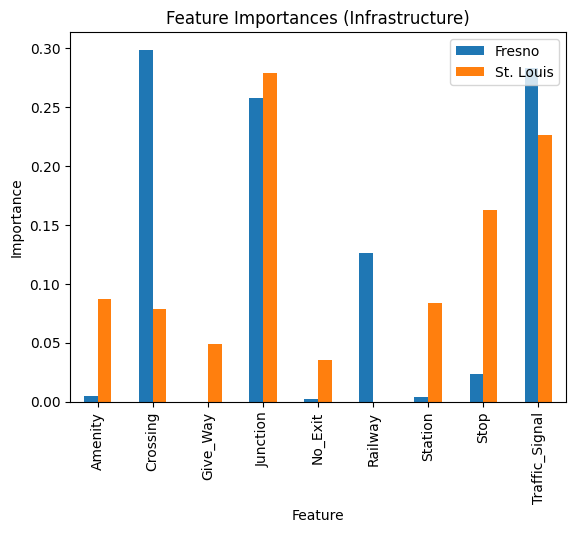

In [99]:
# plots for importances
importances1 = pd.Series([i for i, _ in sorted_importance_fresno1], index=[j for _, j in sorted_importance_fresno1])
importances2 = pd.Series([i for i, _ in sorted_importance_stlouis1], index=[j for _, j in sorted_importance_stlouis1])
overall = pd.DataFrame({"Fresno": importances1, "St. Louis": importances2})

ax = overall.plot(kind='bar')
plt.legend()
plt.title("Feature Importances (Infrastructure)")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.savefig("infrastructure_importances.png")
plt.show()


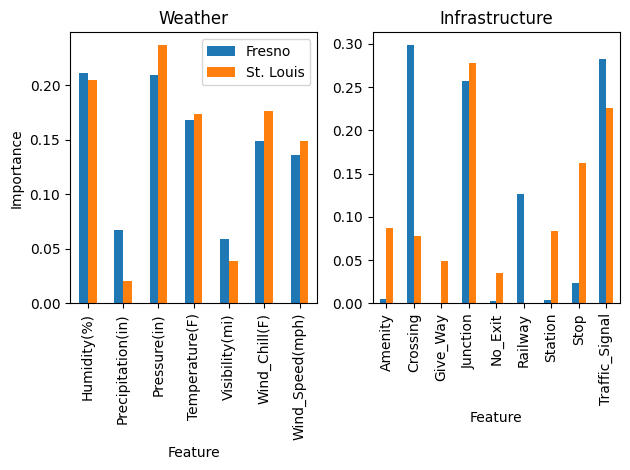

In [108]:
# put them in subplots
# weather
importances1 = pd.Series([i for i, _ in sorted_importance_fresno], index=[j for _, j in sorted_importance_fresno])
importances2 = pd.Series([i for i, _ in sorted_importance_stlouis], index=[j for _, j in sorted_importance_stlouis])
overall = pd.DataFrame({"Fresno": importances1, "St. Louis": importances2})

# infrastructure
importances3 = pd.Series([i for i, _ in sorted_importance_fresno1], index=[j for _, j in sorted_importance_fresno1])
importances4 = pd.Series([i for i, _ in sorted_importance_stlouis1], index=[j for _, j in sorted_importance_stlouis1])
overall1 = pd.DataFrame({"Fresno": importances3, "St. Louis": importances4})

fig, axes = plt.subplots(nrows=1, ncols=2)

overall.plot(ax=axes[0], kind='bar')
axes[0].set_title("Weather")
axes[0].set_ylabel("Importance")
axes[0].set_xlabel("Feature")

overall1.plot(ax=axes[1], kind='bar', legend=False)
axes[1].set_title("Infrastructure")
axes[1].set_xlabel("Feature")

plt.tight_layout()
plt.savefig("both_importances.png")

